In [635]:
#Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels
import statsmodels.api as sm
#for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#for Test data Evaluation
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# 1. Data Understanding


In [636]:
bs = pd.read_csv("day.csv")
print(bs.shape)
print(bs.info())
print(bs.describe())
bs.head()

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
          instant      season          yr        mnth     holiday     weekday 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [637]:
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [638]:
#Renaming the target variable
bs.rename(columns={'cnt':'Count', 'temp':'Temperature', 'hum':'Humidity'},inplace=True)
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,Temperature,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<font color= 'yellow'>
Inferences from dataset
<font color>

Dataset contains 16 columns and 730 entries
There are no null values available.
Cnt - Count is the target variable
There are variable which are repeated twice(like yr and date). So we need to eliminate those fields
There are categorical variables which we need to take care eventhough they are in numeric format.

# 2.Check Whether Linear Regression can be used 

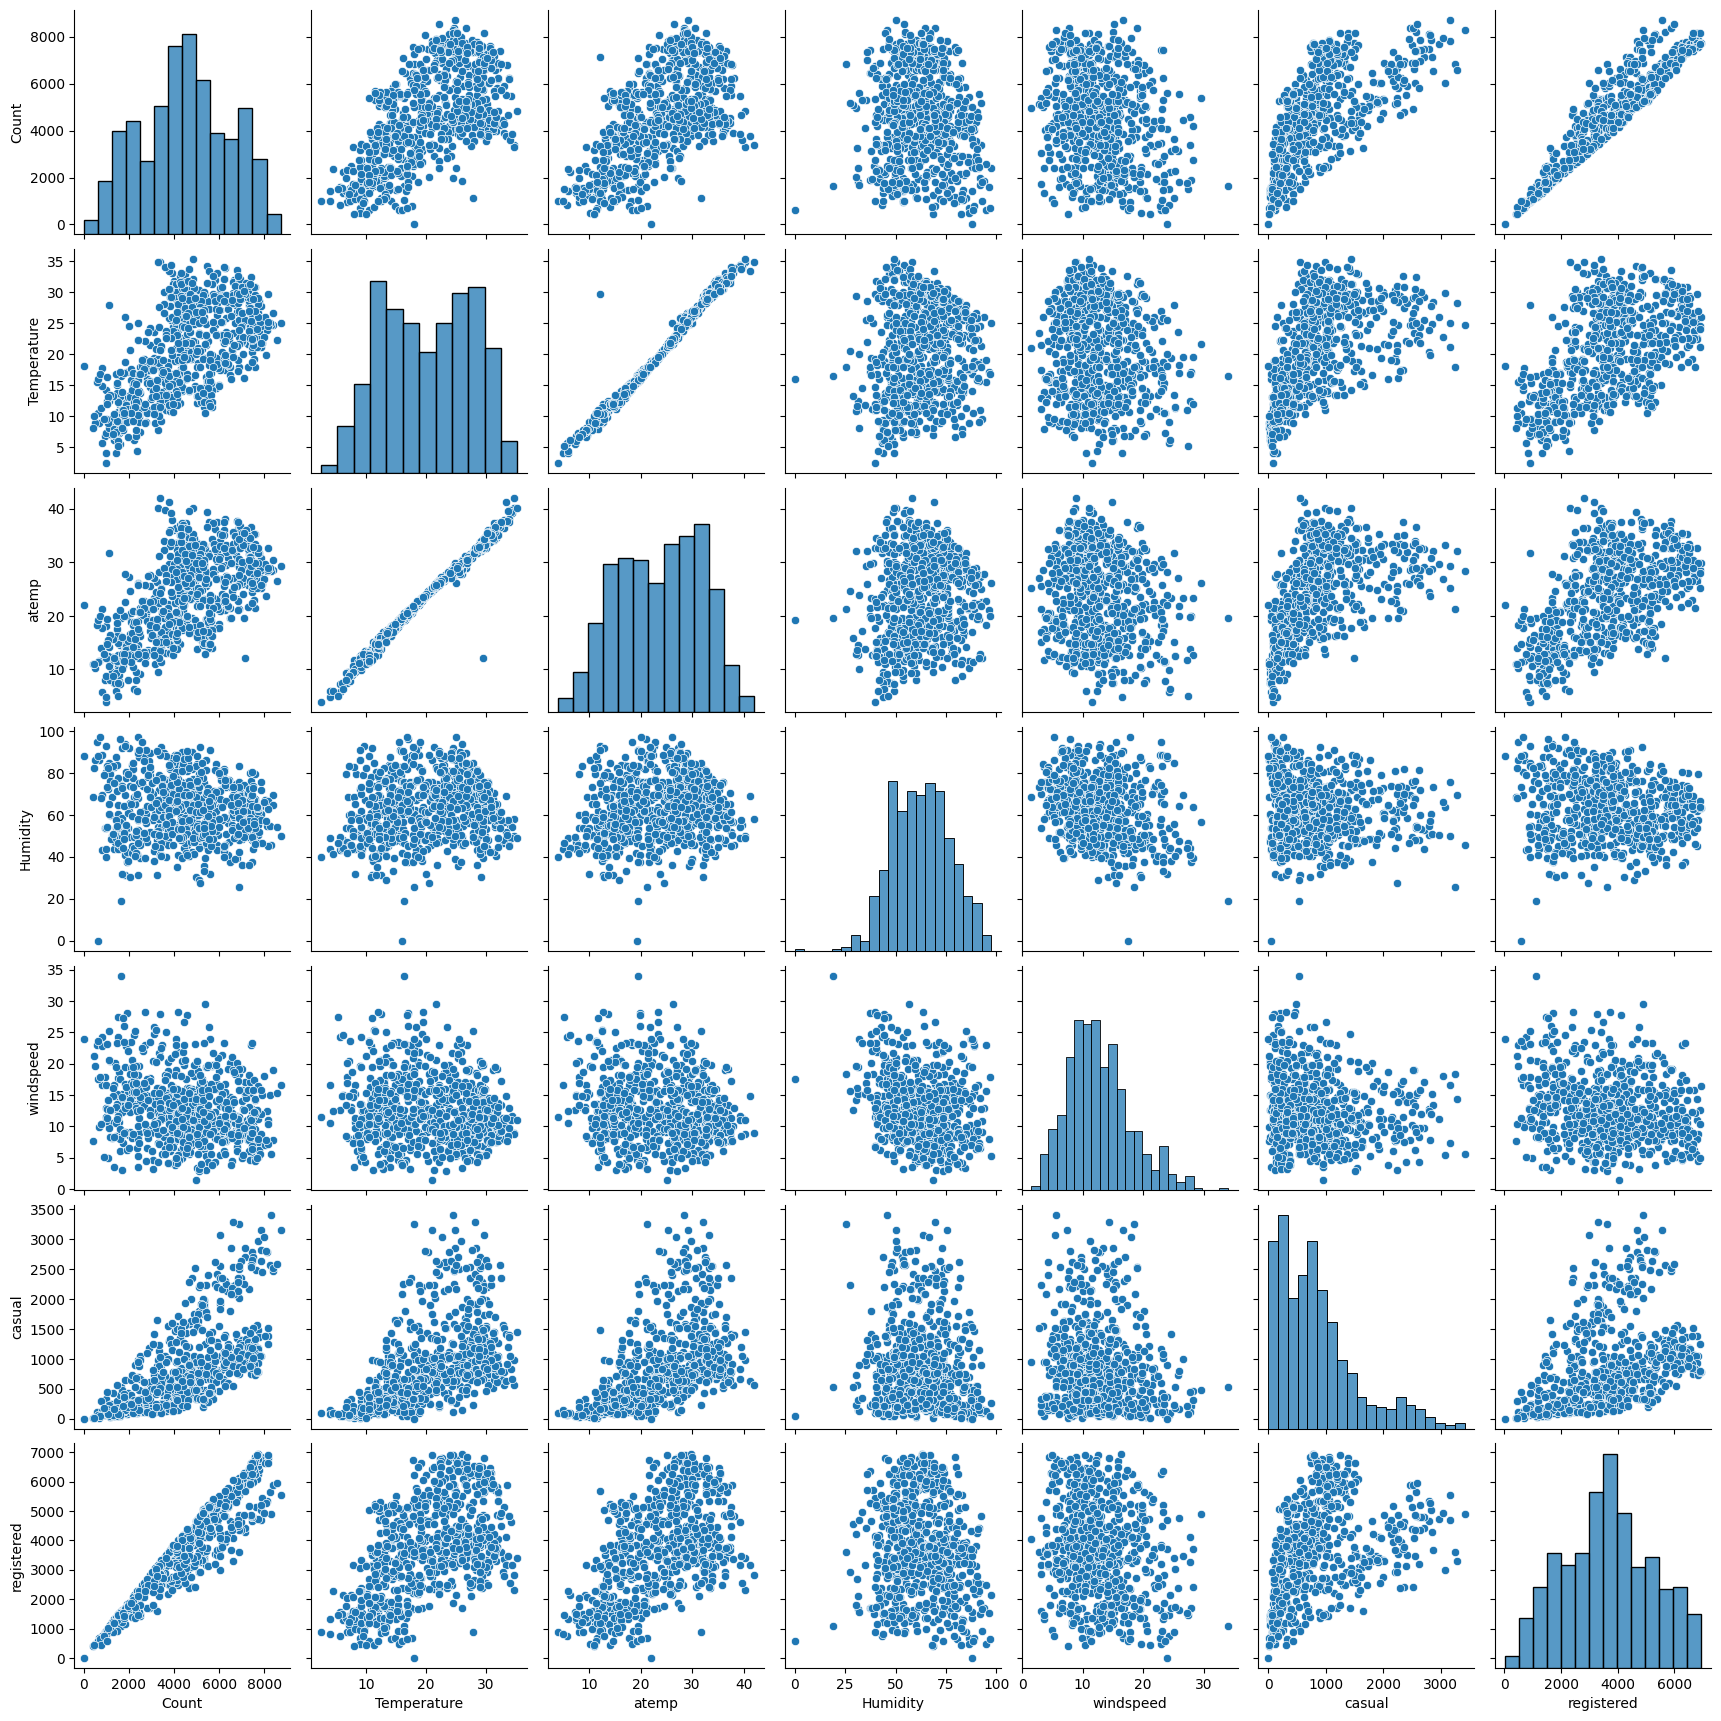

In [639]:
# Checking whether any relation is there between numerical variables and target variables. 
# To check whether Linear Regression will be applicable. For now we will consider onky numerical variables for the same.
# Pair plot for numerical variables and Box plot for categorical variables.
bs_1 = bs[['Count','Temperature','atemp', 'Humidity', 'windspeed', 'casual','registered']] 
sns.pairplot(bs_1)
plt.show()

<AxesSubplot: xlabel='weathersit', ylabel='Count'>

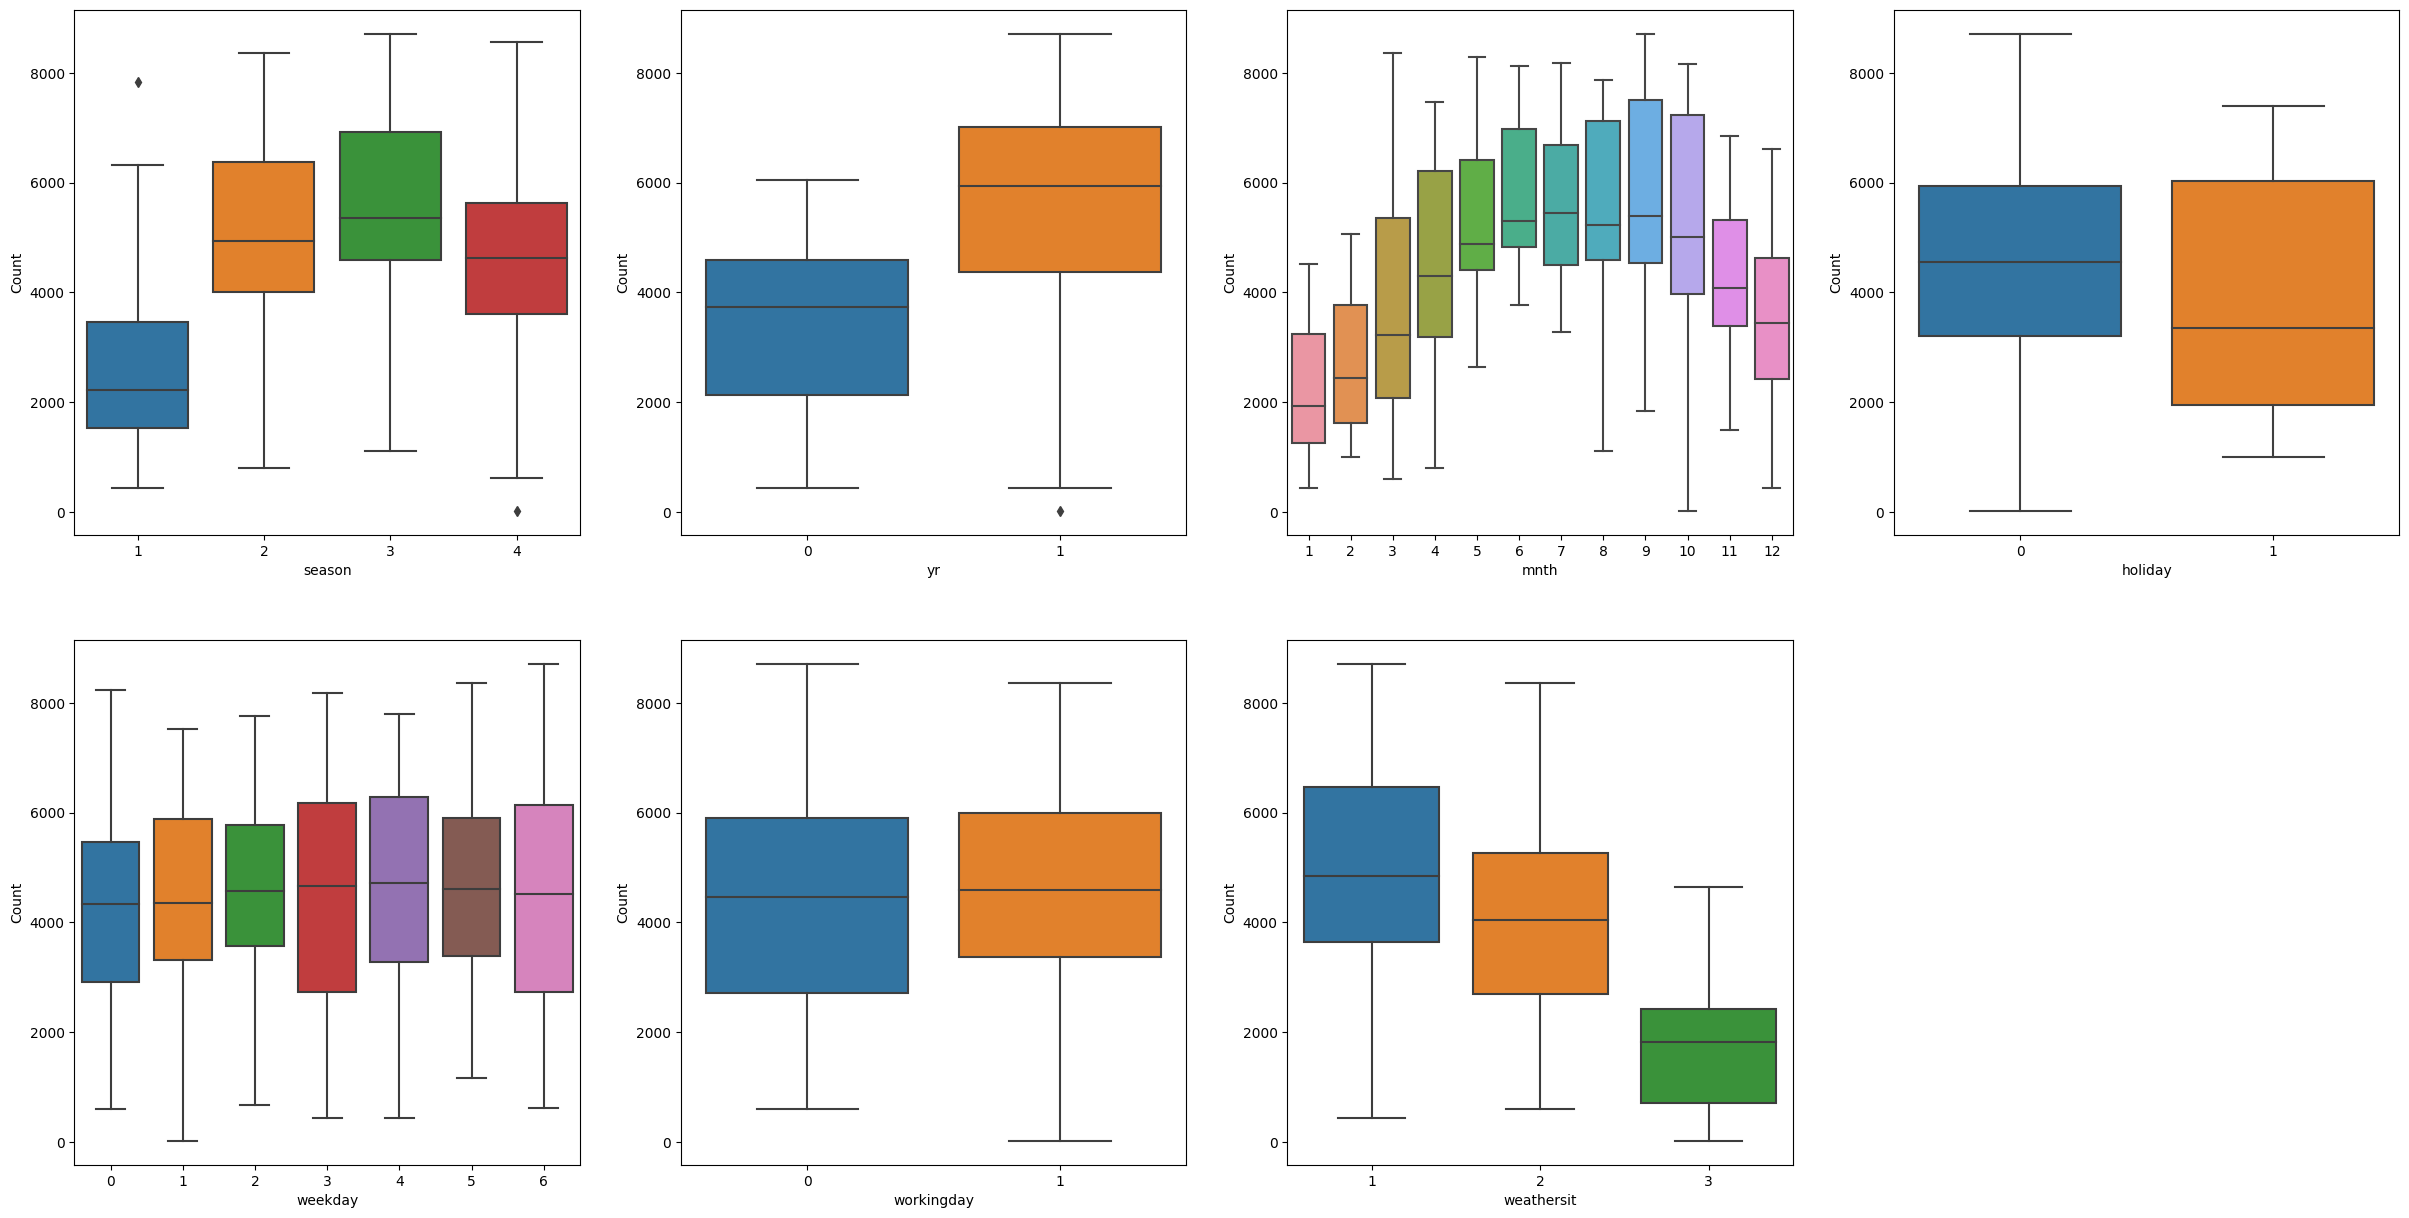

In [640]:
# For checking categorical variable

plt.figure(figsize=(30,15))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='Count', data=bs)

plt.subplot(2,4,2)
sns.boxplot(x='yr', y='Count', data=bs)

plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='Count', data=bs)

plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='Count', data=bs)

plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='Count', data=bs)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='Count', data=bs)

plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='Count', data=bs)

<AxesSubplot: >

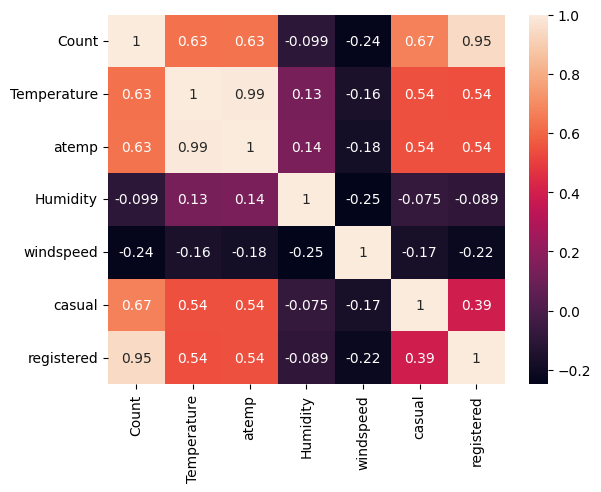

In [641]:
# Check the correlation 

sns.heatmap(bs_1.corr(),annot=True)

Correlation Between atemp and temp is .99 . so hence we will be dropping one of this field.

<font color= 'yellow'>
Inferences from above plots
<font color>

Seasons, year , month , weather situation, registered and casual users etc show a significant relation with count.
So we can make you of Linear Regression in this scenario.

### Linear Regression Assumptions:
The Error are normally distributed
The predicted values have linear relationship with actual values
The training and test set accuracy is narly same

# 3. Data Preparation for Modelling

Drop the variables which are not relevant.
All our cateogical variables are in numerical format. Now we need to create Dummy variables(n-1)/one hot encoding. Else as the number is high, priority given to that higher number will be more . To avoid that we need to convert the variables . Here we will be using one hot encoding

In [642]:
#Remove below fields:
# instant(as this is just an index number)
# dteday(since we have month and year already)
# Since correlation between  temp and atemp is .99 dropping atemp to avoid Multicollinearity.
# remove casual and registered since we cant predict these for future. So to avaoid data leakage remove casual and registered.

bs = bs.drop('instant', axis=1)
bs = bs.drop('dteday', axis=1)
bs = bs.drop('atemp', axis=1)
bs = bs.drop('casual', axis=1)
bs = bs.drop('registered', axis=1)

bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,Temperature,Humidity,windspeed,Count
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [643]:
# Creating dummy variables for Season
season_codes = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bs['season'] = bs['season'].map(season_codes)
bs.head()
seasons = pd.get_dummies(bs['season'],drop_first=True)
bs =  pd.concat([bs,seasons], axis=1)
bs = bs.drop('season', axis= 1)
bs.head()

,yr,mnth,holiday,weekday,workingday,weathersit,Temperature,Humidity,windspeed,Count,spring,summer,winter
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


In [644]:
# Creating dummy variables for year
year_codes = {0:'YR_2018', 1:'YR_2019'}
bs['yr'] = bs['yr'].map(year_codes)
bs.head()
year = pd.get_dummies(bs['yr'],drop_first=True)
bs =  pd.concat([bs,year],axis=1)
bs = bs.drop('yr', axis= 1)
bs.head()

,mnth,holiday,weekday,workingday,weathersit,Temperature,Humidity,windspeed,Count,spring,summer,winter,YR_2019
0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0,0
1,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0,0
2,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0
3,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0,0
4,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0


In [645]:
# Creating dummy variables for holiday
holiday_codes = {0:'holiday', 1:'no_holiday'}
bs['holiday'] = bs['holiday'].map(holiday_codes)
bs.head()
holidays = pd.get_dummies(bs['holiday'],drop_first=True)
bs =  pd.concat([bs,holidays],axis=1)
bs = bs.drop('holiday', axis= 1)
bs.head()

,mnth,weekday,workingday,weathersit,Temperature,Humidity,windspeed,Count,spring,summer,winter,YR_2019,no_holiday
0,1,6,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0
1,1,0,0,2,14.902598,69.6087,16.652113,801,1,0,0,0,0
2,1,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,1,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,1,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [646]:
# Creating dummy variables for Month
month_codes = {1:'JAN', 2:'FEB', 3:'MAR', 4:'APR',5:'MAY',6:'JUN', 7:'JUL', 8:'AUG', 9:'SEP',10:'OCT', 11:'NOV', 12:'DEC'}
bs['mnth'] = bs['mnth'].map(month_codes)
bs.head()
months = pd.get_dummies(bs['mnth'],drop_first=True)
bs =  pd.concat([bs,months], axis=1)
bs = bs.drop('mnth', axis= 1)
bs.head()

,weekday,workingday,weathersit,Temperature,Humidity,windspeed,Count,spring,summer,winter,...,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP
0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [647]:
# Creating dummy variables for Weekday
weekday_codes = {0:'SUN', 1:'MON', 2:'TUE', 3:'WED', 4:'THR',5:'FRI', 6:'SAT'}
bs['weekday'] = bs['weekday'].map(weekday_codes)
bs.head()
weekdays = pd.get_dummies(bs['weekday'],drop_first=True)
bs =  pd.concat([bs,weekdays], axis=1)
bs = bs.drop('weekday', axis= 1)
bs.head()

,workingday,weathersit,Temperature,Humidity,windspeed,Count,spring,summer,winter,YR_2019,...,MAY,NOV,OCT,SEP,MON,SAT,SUN,THR,TUE,WED
0,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,2,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [648]:
# Creating dummy variables for Workingday
workingday_codes = {0:'NotWorkingday', 1:'Workingday'}
bs['workingday'] = bs['workingday'].map(workingday_codes)
bs.head()
workingkdays = pd.get_dummies(bs['workingday'],drop_first=True)
bs =  pd.concat([bs,workingkdays], axis=1)
bs = bs.drop('workingday', axis= 1)
bs.head()

,weathersit,Temperature,Humidity,windspeed,Count,spring,summer,winter,YR_2019,no_holiday,...,NOV,OCT,SEP,MON,SAT,SUN,THR,TUE,WED,Workingday
0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [649]:
# Creating dummy variables for Weather Situation
Weathersit_codes = {1:'Clear', 2:'Mist',3:'Snow',4:'Heavyrain'}
bs['weathersit'] = bs['weathersit'].map(Weathersit_codes)
bs.head()
weathersits = pd.get_dummies(bs['weathersit'],drop_first=True)
bs =  pd.concat([bs,weathersits], axis=1)
bs = bs.drop('weathersit', axis= 1)
bs.head()

,Temperature,Humidity,windspeed,Count,spring,summer,winter,YR_2019,no_holiday,AUG,...,SEP,MON,SAT,SUN,THR,TUE,WED,Workingday,Mist,Snow
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


# 4. Split Train - Test Dataset

In [650]:
bs_train, bs_test = train_test_split(bs, train_size=.7, random_state=100)
print(bs_train.shape)
print(bs_test.shape)
#bs_train will be train set and bs_test will be test set


(510, 29)
(220, 29)


# 5. Rescaling - Normalization and Standardization

Since the outliners are less we willbe using normalization for this dataset.

In [651]:
# Instantiate the object
scaler = MinMaxScaler()

# Variables for sacaling 
num_vars = ['Temperature','Humidity','windspeed','Count']
bs_train[num_vars] = scaler.fit_transform(bs_train[num_vars])
bs_train.head()

,Temperature,Humidity,windspeed,Count,spring,summer,winter,YR_2019,no_holiday,AUG,...,SEP,MON,SAT,SUN,THR,TUE,WED,Workingday,Mist,Snow
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


# 6. Creating and Training the Model

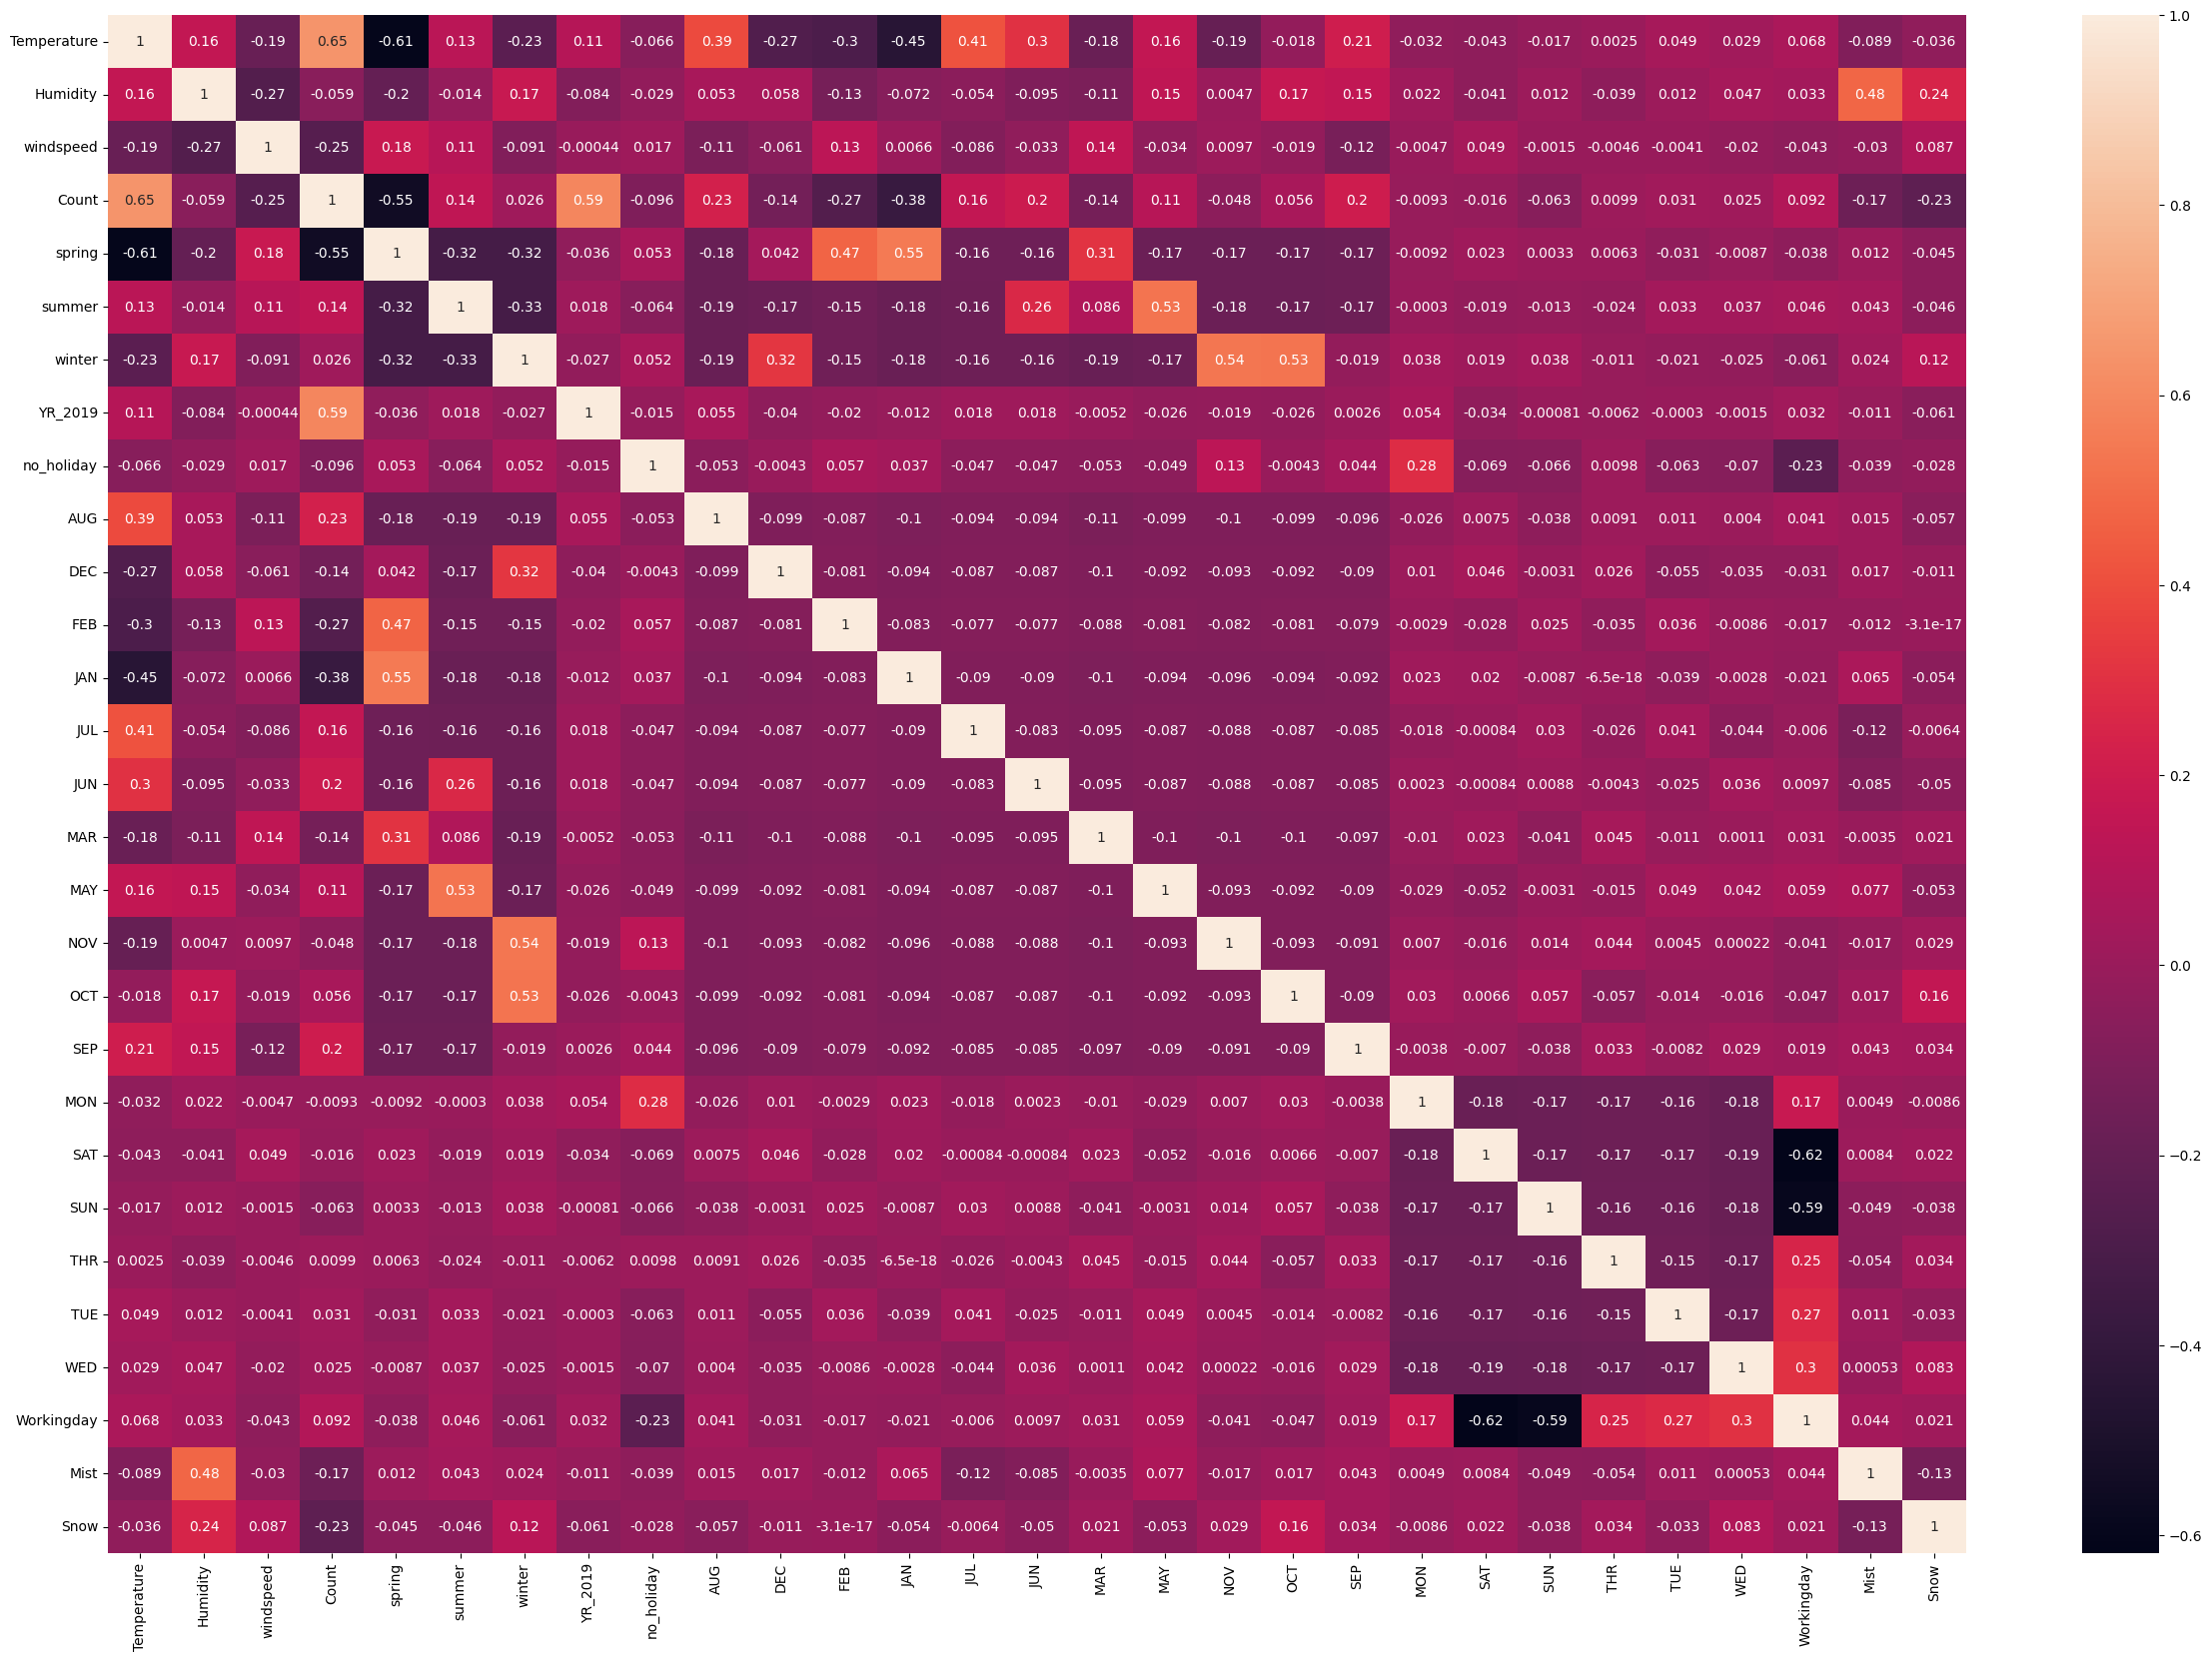

In [652]:
plt.figure(figsize=(30,20))
sns.heatmap(bs_train.corr(),annot=True)
plt.show()

In [653]:
#bs_train_m  stands for train data set for manual process
bs_train_m = bs_train
y_train = bs_train_m.pop('Count')
X_train = bs_train_m
X_train
bs_train


,Temperature,Humidity,windspeed,spring,summer,winter,YR_2019,no_holiday,AUG,DEC,...,SEP,MON,SAT,SUN,THR,TUE,WED,Workingday,Mist,Snow
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
53,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
350,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
79,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [654]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  730 non-null    float64
 1   Humidity     730 non-null    float64
 2   windspeed    730 non-null    float64
 3   Count        730 non-null    int64  
 4   spring       730 non-null    uint8  
 5   summer       730 non-null    uint8  
 6   winter       730 non-null    uint8  
 7   YR_2019      730 non-null    uint8  
 8   no_holiday   730 non-null    uint8  
 9   AUG          730 non-null    uint8  
 10  DEC          730 non-null    uint8  
 11  FEB          730 non-null    uint8  
 12  JAN          730 non-null    uint8  
 13  JUL          730 non-null    uint8  
 14  JUN          730 non-null    uint8  
 15  MAR          730 non-null    uint8  
 16  MAY          730 non-null    uint8  
 17  NOV          730 non-null    uint8  
 18  OCT          730 non-null    uint8  
 19  SEP     

<font color= 'green'>
### 1.Modelling either we can start with one variable and keep on adding other variables. 
### 2.Or Start with all vaiables and remove others. 
### we will be following 2nd approach - We will Start with RFE and manually remove the data
</font color>

<font color= 'white'>
Manual Process 
</font color>

In [655]:
#adding constant
X_train_sm = sm.add_constant(X_train)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          3.00e-181
Time:                        20:48:19   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2431      0.035      6.888      0.000       0.174       0.312
Temperature     0.4454      0.046      9.628      0.000       0.354       0.536
Humidity       -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed      -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring         -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer          0.0430      0.026      1.645      0.101      -0.008       0.094
winter          0.1076      0.028      3.853      0.000       0.053       0.163
YR_2019         0.2324      0.008     28.819      0.000       0.217       0.248
no_holiday      0.0100      0.024      0.418      0.676      -0.037       0.057
AUG             0.0204      0.034      0.607      0.544      -0.046       0.086
DEC            -0.0443      0.034     -1.317      0.189      -0.110       0.022
FEB            -0.0324      0.033     -0.985      0.325      -0.097       0.032
JAN            -0.0633      0.034     -1.885      0.060      -0.129       0.003
JUL            -0.0338      0.035     -0.969      0.333      -0.102       0.035
JUN             0.0046      0.025      0.186      0.853      -0.044       0.053
MAR             0.0013      0.025      0.052      0.959      -0.047       0.050
MAY             0.0247      0.021      1.173      0.241      -0.017       0.066
NOV            -0.0399      0.036     -1.096      0.274      -0.111       0.032
OCT             0.0075      0.036      0.210      0.834      -0.063       0.078
SEP             0.0859      0.032      2.692      0.007       0.023       0.149
MON            -0.0209      0.015     -1.365      0.173      -0.051       0.009
SAT             0.0956      0.014      6.958      0.000       0.069       0.123
SUN             0.0413      0.014      2.964      0.003       0.014       0.069
THR            -0.0091      0.016     -0.588      0.557      -0.040       0.021
TUE            -0.0179      0.016     -1.156      0.248      -0.048       0.013
WED            -0.0055      0.015     -0.368      0.713      -0.035       0.024
Workingday      0.0962      0.012      7.835      0.000       0.072       0.120
Mist           -0.0596      0.010     -5.709      0.000      -0.080      -0.039
Snow           -0.2558      0.026     -9.699      0.000      -0.308      -0.204
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covar

<font color= 'yellow'>
Inferences
</font color>

adjusted r^2 = 84.4 and r2= 85.3
There are different field with p value greater than .05, we need to adjust it.
aTemp field is dropped to avaoid multi collinearity
Check for significance (p values) -> Reject the values which are higher than .05
VIF-> Should be less than 5
  High P and High VIF -> Reject the value
  High P and Low VIF  -> 1st remove the one with high P and calculate VIF and check
  High VIF and low P  ->1st remove the one with high P and calculate VIF and check

In [656]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
25,Workingday,85.54
20,SAT,19.71
21,SUN,18.34
3,spring,10.75
5,winter,9.44
4,summer,8.27
0,Temperature,7.08
16,NOV,6.79
17,OCT,6.47
8,AUG,6.36


In [657]:
# Start Removing the one where both are high ->OCT(October)
X = X_train.drop('OCT',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.93e-182
Time:                        20:48:20   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2456      0.033      7.416      0.000       0.181       0.311
Temperature     0.4450      0.046      9.636      0.000       0.354       0.536
Humidity       -0.1505      0.038     -3.937      0.000      -0.226      -0.075
windspeed      -0.1860      0.026     -7.232      0.000      -0.237      -0.135
spring         -0.0448      0.030     -1.497      0.135      -0.104       0.014
summer          0.0407      0.024      1.717      0.087      -0.006       0.087
winter          0.1105      0.024      4.539      0.000       0.063       0.158
YR_2019         0.2324      0.008     28.863      0.000       0.217       0.248
no_holiday      0.0109      0.024      0.461      0.645      -0.036       0.057
AUG             0.0170      0.029      0.578      0.563      -0.041       0.075
DEC            -0.0499      0.020     -2.446      0.015      -0.090      -0.010
FEB            -0.0360      0.028     -1.273      0.204      -0.092       0.020
JAN            -0.0669      0.029     -2.316      0.021      -0.124      -0.010
JUL            -0.0372      0.031     -1.201      0.230      -0.098       0.024
JUN             0.0027      0.023      0.117      0.907      -0.043       0.048
MAR            -0.0014      0.021     -0.067      0.947      -0.043       0.040
MAY             0.0235      0.020      1.161      0.246      -0.016       0.063
NOV            -0.0463      0.019     -2.381      0.018      -0.085      -0.008
SEP             0.0818      0.025      3.269      0.001       0.033       0.131
MON            -0.0210      0.015     -1.369      0.172      -0.051       0.009
SAT             0.0961      0.013      7.150      0.000       0.070       0.123
SUN             0.0419      0.014      3.065      0.002       0.015       0.069
THR            -0.0091      0.016     -0.586      0.558      -0.040       0.021
TUE            -0.0180      0.015     -1.160      0.247      -0.048       0.012
WED            -0.0055      0.015     -0.369      0.712      -0.035       0.024
Workingday      0.0967      0.012      8.066      0.000       0.073       0.120
Mist           -0.0596      0.010     -5.723      0.000      -0.080      -0.039
Snow           -0.2557      0.026     -9.707      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       83.003   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.019
Skew:                          -0.793   Prob(JB):                     1.86e-50
Kurtosis:                       5.874   Cond. No.                     1.86e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue i

In [658]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
24,Workingday,76.07
19,SAT,17.49
20,SUN,16.31
3,spring,10.75
5,winter,7.18
0,Temperature,7.08
4,summer,6.81
8,AUG,4.86
12,JUL,4.42
11,JAN,4.37


In [659]:
X = X.drop('MAR',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.74e-183
Time:                        20:48:20   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2452      0.032      7.585      0.000       0.182       0.309
Temperature     0.4455      0.045      9.802      0.000       0.356       0.535
Humidity       -0.1505      0.038     -3.943      0.000      -0.226      -0.076
windspeed      -0.1859      0.026     -7.249      0.000      -0.236      -0.135
spring         -0.0456      0.028     -1.643      0.101      -0.100       0.009
summer          0.0406      0.024      1.717      0.087      -0.006       0.087
winter          0.1107      0.024      4.569      0.000       0.063       0.158
YR_2019         0.2324      0.008     28.897      0.000       0.217       0.248
no_holiday      0.0109      0.024      0.459      0.646      -0.036       0.057
AUG             0.0172      0.029      0.590      0.555      -0.040       0.074
DEC            -0.0493      0.018     -2.678      0.008      -0.085      -0.013
FEB            -0.0348      0.022     -1.603      0.110      -0.077       0.008
JAN            -0.0656      0.022     -3.011      0.003      -0.108      -0.023
JUL            -0.0370      0.031     -1.201      0.230      -0.098       0.024
JUN             0.0030      0.023      0.131      0.896      -0.042       0.048
MAY             0.0238      0.020      1.219      0.223      -0.015       0.062
NOV            -0.0461      0.019     -2.422      0.016      -0.083      -0.009
SEP             0.0820      0.025      3.318      0.001       0.033       0.131
MON            -0.0210      0.015     -1.372      0.171      -0.051       0.009
SAT             0.0960      0.013      7.255      0.000       0.070       0.122
SUN             0.0418      0.014      3.085      0.002       0.015       0.068
THR            -0.0091      0.015     -0.590      0.556      -0.040       0.021
TUE            -0.0180      0.015     -1.162      0.246      -0.048       0.012
WED            -0.0055      0.015     -0.370      0.712      -0.035       0.024
Workingday      0.0966      0.012      8.208      0.000       0.073       0.120
Mist           -0.0596      0.010     -5.729      0.000      -0.080      -0.039
Snow           -0.2557      0.026     -9.717      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       82.911   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.194
Skew:                          -0.793   Prob(JB):                     2.81e-50
Kurtosis:                       5.867   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-29. This might indicate that there are
strong multicollinearity problems

In [660]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif


,Features,VIF
23,Workingday,72.24
18,SAT,16.60
19,SUN,15.58
3,spring,9.25
5,winter,7.12
0,Temperature,6.87
4,summer,6.81
8,AUG,4.80
12,JUL,4.39
7,no_holiday,3.96


In [661]:
X = X.drop('JUN',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.53e-184
Time:                        20:48:20   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2453      0.032      7.603      0.000       0.182       0.309
Temperature     0.4487      0.038     11.669      0.000       0.373       0.524
Humidity       -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed      -0.1862      0.025     -7.313      0.000      -0.236      -0.136
spring         -0.0466      0.027     -1.747      0.081      -0.099       0.006
summer          0.0401      0.023      1.722      0.086      -0.006       0.086
winter          0.1096      0.023      4.826      0.000       0.065       0.154
YR_2019         0.2323      0.008     29.032      0.000       0.217       0.248
no_holiday      0.0107      0.024      0.453      0.651      -0.036       0.057
AUG             0.0150      0.024      0.633      0.527      -0.031       0.061
DEC            -0.0490      0.018     -2.689      0.007      -0.085      -0.013
FEB            -0.0344      0.021     -1.602      0.110      -0.077       0.008
JAN            -0.0650      0.021     -3.059      0.002      -0.107      -0.023
JUL            -0.0395      0.025     -1.600      0.110      -0.088       0.009
MAY             0.0226      0.017      1.307      0.192      -0.011       0.057
NOV            -0.0459      0.019     -2.421      0.016      -0.083      -0.009
SEP             0.0804      0.021      3.748      0.000       0.038       0.123
MON            -0.0209      0.015     -1.370      0.171      -0.051       0.009
SAT             0.0961      0.013      7.298      0.000       0.070       0.122
SUN             0.0419      0.013      3.105      0.002       0.015       0.068
THR            -0.0092      0.015     -0.591      0.555      -0.040       0.021
TUE            -0.0180      0.015     -1.164      0.245      -0.048       0.012
WED            -0.0055      0.015     -0.367      0.714      -0.035       0.024
Workingday      0.0966      0.012      8.230      0.000       0.074       0.120
Mist           -0.0595      0.010     -5.737      0.000      -0.080      -0.039
Snow           -0.2556      0.026     -9.726      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                     1.22e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [662]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
22,Workingday,72.11
17,SAT,16.55
18,SUN,15.54
3,spring,8.55
4,summer,6.60
5,winter,6.27
0,Temperature,4.92
7,no_holiday,3.96
8,AUG,3.17
12,JUL,2.81


In [663]:
X = X.drop('WED',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.42e-185
Time:                        20:48:21   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2447      0.032      7.601      0.000       0.181       0.308
Temperature     0.4483      0.038     11.674      0.000       0.373       0.524
Humidity       -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed      -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring         -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer          0.0399      0.023      1.716      0.087      -0.006       0.086
winter          0.1095      0.023      4.830      0.000       0.065       0.154
YR_2019         0.2322      0.008     29.055      0.000       0.217       0.248
no_holiday      0.0092      0.023      0.398      0.691      -0.036       0.055
AUG             0.0151      0.024      0.638      0.524      -0.031       0.061
DEC            -0.0489      0.018     -2.689      0.007      -0.085      -0.013
FEB            -0.0344      0.021     -1.603      0.110      -0.076       0.008
JAN            -0.0651      0.021     -3.067      0.002      -0.107      -0.023
JUL            -0.0392      0.025     -1.591      0.112      -0.088       0.009
MAY             0.0227      0.017      1.311      0.191      -0.011       0.057
NOV            -0.0462      0.019     -2.443      0.015      -0.083      -0.009
SEP             0.0803      0.021      3.746      0.000       0.038       0.122
MON            -0.0179      0.013     -1.389      0.165      -0.043       0.007
SAT             0.0974      0.013      7.663      0.000       0.072       0.122
SUN             0.0432      0.013      3.313      0.001       0.018       0.069
THR            -0.0061      0.013     -0.467      0.640      -0.032       0.020
TUE            -0.0150      0.013     -1.145      0.253      -0.041       0.011
Workingday      0.0949      0.011      8.858      0.000       0.074       0.116
Mist           -0.0593      0.010     -5.730      0.000      -0.080      -0.039
Snow           -0.2563      0.026     -9.782      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [664]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif


,Features,VIF
21,Workingday,70.18
17,SAT,16.52
18,SUN,15.51
3,spring,8.55
4,summer,6.60
5,winter,6.27
0,Temperature,4.92
7,no_holiday,3.91
8,AUG,3.17
12,JUL,2.81


In [665]:
X = X.drop('no_holiday',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.42e-185
Time:                        20:48:21   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2539      0.048      5.250      0.000       0.159       0.349
Temperature     0.4483      0.038     11.674      0.000       0.373       0.524
Humidity       -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed      -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring         -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer          0.0399      0.023      1.716      0.087      -0.006       0.086
winter          0.1095      0.023      4.830      0.000       0.065       0.154
YR_2019         0.2322      0.008     29.055      0.000       0.217       0.248
AUG             0.0151      0.024      0.638      0.524      -0.031       0.061
DEC            -0.0489      0.018     -2.689      0.007      -0.085      -0.013
FEB            -0.0344      0.021     -1.603      0.110      -0.076       0.008
JAN            -0.0651      0.021     -3.067      0.002      -0.107      -0.023
JUL            -0.0392      0.025     -1.591      0.112      -0.088       0.009
MAY             0.0227      0.017      1.311      0.191      -0.011       0.057
NOV            -0.0462      0.019     -2.443      0.015      -0.083      -0.009
SEP             0.0803      0.021      3.746      0.000       0.038       0.122
MON            -0.0179      0.013     -1.389      0.165      -0.043       0.007
SAT             0.0881      0.029      3.043      0.002       0.031       0.145
SUN             0.0339      0.029      1.168      0.244      -0.023       0.091
THR            -0.0061      0.013     -0.467      0.640      -0.032       0.020
TUE            -0.0150      0.013     -1.145      0.253      -0.041       0.011
Workingday      0.0856      0.026      3.248      0.001       0.034       0.137
Mist           -0.0593      0.010     -5.730      0.000      -0.080      -0.039
Snow           -0.2563      0.026     -9.782      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [666]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
1,Humidity,36.38
0,Temperature,24.25
20,Workingday,20.83
3,spring,8.39
4,summer,6.70
5,winter,6.69
16,SAT,5.91
17,SUN,5.58
2,windspeed,5.13
7,AUG,3.26


In [667]:
X = X.drop('THR',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.36e-186
Time:                        20:48:21   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2512      0.048      5.235      0.000       0.157       0.345
Temperature     0.4484      0.038     11.686      0.000       0.373       0.524
Humidity       -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed      -0.1863      0.025     -7.327      0.000      -0.236      -0.136
spring         -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer          0.0401      0.023      1.726      0.085      -0.006       0.086
winter          0.1099      0.023      4.851      0.000       0.065       0.154
YR_2019         0.2322      0.008     29.077      0.000       0.217       0.248
AUG             0.0152      0.024      0.645      0.520      -0.031       0.062
DEC            -0.0492      0.018     -2.709      0.007      -0.085      -0.014
FEB            -0.0340      0.021     -1.590      0.112      -0.076       0.008
JAN            -0.0650      0.021     -3.066      0.002      -0.107      -0.023
JUL            -0.0389      0.025     -1.583      0.114      -0.087       0.009
MAY             0.0228      0.017      1.317      0.188      -0.011       0.057
NOV            -0.0466      0.019     -2.472      0.014      -0.084      -0.010
SEP             0.0803      0.021      3.747      0.000       0.038       0.122
MON            -0.0160      0.012     -1.310      0.191      -0.040       0.008
SAT             0.0905      0.028      3.175      0.002       0.034       0.146
SUN             0.0363      0.029      1.268      0.205      -0.020       0.092
TUE            -0.0131      0.012     -1.052      0.293      -0.037       0.011
Workingday      0.0861      0.026      3.269      0.001       0.034       0.138
Mist           -0.0591      0.010     -5.719      0.000      -0.079      -0.039
Snow           -0.2565      0.026     -9.797      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [668]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif


,Features,VIF
1,Humidity,36.34
0,Temperature,24.14
19,Workingday,20.80
3,spring,8.36
4,summer,6.68
5,winter,6.68
16,SAT,5.81
17,SUN,5.49
2,windspeed,5.12
7,AUG,3.26


In [669]:
X = X.drop('SUN',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.46e-187
Time:                        20:48:21   Log-Likelihood:                 525.97
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     488   BIC:                            -914.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2838      0.041      7.000      0.000       0.204       0.363
Temperature     0.4456      0.038     11.624      0.000       0.370       0.521
Humidity       -0.1499      0.038     -3.979      0.000      -0.224      -0.076
windspeed      -0.1863      0.025     -7.325      0.000      -0.236      -0.136
spring         -0.0476      0.027     -1.788      0.074      -0.100       0.005
summer          0.0399      0.023      1.714      0.087      -0.006       0.086
winter          0.1102      0.023      4.861      0.000       0.066       0.155
YR_2019         0.2326      0.008     29.125      0.000       0.217       0.248
AUG             0.0155      0.024      0.656      0.512      -0.031       0.062
DEC            -0.0505      0.018     -2.779      0.006      -0.086      -0.015
FEB            -0.0353      0.021     -1.650      0.100      -0.077       0.007
JAN            -0.0663      0.021     -3.126      0.002      -0.108      -0.025
JUL            -0.0379      0.025     -1.539      0.124      -0.086       0.010
MAY             0.0230      0.017      1.330      0.184      -0.011       0.057
NOV            -0.0500      0.019     -2.674      0.008      -0.087      -0.013
SEP             0.0787      0.021      3.678      0.000       0.037       0.121
MON            -0.0212      0.011     -1.845      0.066      -0.044       0.001
SAT             0.0590      0.014      4.225      0.000       0.032       0.086
TUE            -0.0144      0.012     -1.159      0.247      -0.039       0.010
Workingday      0.0558      0.011      5.014      0.000       0.034       0.078
Mist           -0.0591      0.010     -5.720      0.000      -0.079      -0.039
Snow           -0.2567      0.026     -9.803      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       87.899   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.412
Skew:                          -0.828   Prob(JB):                     4.20e-55
Kurtosis:                       6.007   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [670]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
1,Humidity,33.44
0,Temperature,21.97
3,spring,7.41
5,winter,5.97
4,summer,5.90
18,Workingday,5.19
2,windspeed,4.94
7,AUG,3.15
11,JUL,2.79
10,JAN,2.41


In [671]:
X = X.drop('AUG',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.60e-188
Time:                        20:48:21   Log-Likelihood:                 525.74
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -920.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2923      0.038      7.615      0.000       0.217       0.368
Temperature     0.4474      0.038     11.708      0.000       0.372       0.522
Humidity       -0.1488      0.038     -3.955      0.000      -0.223      -0.075
windspeed      -0.1865      0.025     -7.337      0.000      -0.236      -0.137
spring         -0.0575      0.022     -2.627      0.009      -0.100      -0.014
summer          0.0294      0.017      1.739      0.083      -0.004       0.063
winter          0.1010      0.018      5.665      0.000       0.066       0.136
YR_2019         0.2327      0.008     29.175      0.000       0.217       0.248
DEC            -0.0512      0.018     -2.829      0.005      -0.087      -0.016
FEB            -0.0353      0.021     -1.651      0.099      -0.077       0.007
JAN            -0.0663      0.021     -3.128      0.002      -0.108      -0.025
JUL            -0.0489      0.018     -2.722      0.007      -0.084      -0.014
MAY             0.0227      0.017      1.311      0.191      -0.011       0.057
NOV            -0.0510      0.019     -2.739      0.006      -0.088      -0.014
SEP             0.0698      0.017      4.211      0.000       0.037       0.102
MON            -0.0213      0.011     -1.856      0.064      -0.044       0.001
SAT             0.0595      0.014      4.268      0.000       0.032       0.087
TUE            -0.0142      0.012     -1.147      0.252      -0.039       0.010
Workingday      0.0560      0.011      5.032      0.000       0.034       0.078
Mist           -0.0589      0.010     -5.703      0.000      -0.079      -0.039
Snow           -0.2576      0.026     -9.853      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       89.175   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.911
Skew:                          -0.840   Prob(JB):                     7.31e-56
Kurtosis:                       6.021   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [672]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
1,Humidity,31.85
0,Temperature,19.60
3,spring,5.59
17,Workingday,5.13
2,windspeed,4.88
5,winter,4.12
4,summer,3.42
9,JAN,2.39
18,Mist,2.33
6,YR_2019,2.11


In [673]:
X = X.drop('TUE',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.16e-189
Time:                        20:48:22   Log-Likelihood:                 525.06
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2932      0.038      7.637      0.000       0.218       0.369
Temperature     0.4475      0.038     11.707      0.000       0.372       0.523
Humidity       -0.1501      0.038     -3.991      0.000      -0.224      -0.076
windspeed      -0.1871      0.025     -7.358      0.000      -0.237      -0.137
spring         -0.0574      0.022     -2.620      0.009      -0.100      -0.014
summer          0.0291      0.017      1.720      0.086      -0.004       0.062
winter          0.1005      0.018      5.638      0.000       0.065       0.136
YR_2019         0.2327      0.008     29.165      0.000       0.217       0.248
DEC            -0.0505      0.018     -2.788      0.006      -0.086      -0.015
FEB            -0.0364      0.021     -1.705      0.089      -0.078       0.006
JAN            -0.0663      0.021     -3.125      0.002      -0.108      -0.025
JUL            -0.0498      0.018     -2.777      0.006      -0.085      -0.015
MAY             0.0224      0.017      1.297      0.195      -0.012       0.056
NOV            -0.0511      0.019     -2.742      0.006      -0.088      -0.014
SEP             0.0699      0.017      4.214      0.000       0.037       0.103
MON            -0.0183      0.011     -1.640      0.102      -0.040       0.004
SAT             0.0596      0.014      4.280      0.000       0.032       0.087
Workingday      0.0529      0.011      4.899      0.000       0.032       0.074
Mist           -0.0586      0.010     -5.680      0.000      -0.079      -0.038
Snow           -0.2559      0.026     -9.800      0.000      -0.307      -0.205
==============================================================================
Omnibus:                       89.661   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.647
Skew:                          -0.836   Prob(JB):                     1.53e-57
Kurtosis:                       6.085   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [674]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
1,Humidity,31.83
0,Temperature,19.59
3,spring,5.58
2,windspeed,4.88
16,Workingday,4.82
5,winter,4.12
4,summer,3.42
9,JAN,2.39
17,Mist,2.33
6,YR_2019,2.11


In [675]:
X = X.drop('MAY',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.30e-189
Time:                        20:48:22   Log-Likelihood:                 524.18
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2831      0.038      7.525      0.000       0.209       0.357
Temperature     0.4561      0.038     12.108      0.000       0.382       0.530
Humidity       -0.1440      0.037     -3.856      0.000      -0.217      -0.071
windspeed      -0.1887      0.025     -7.426      0.000      -0.239      -0.139
spring         -0.0537      0.022     -2.471      0.014      -0.096      -0.011
summer          0.0387      0.015      2.542      0.011       0.009       0.069
winter          0.1025      0.018      5.771      0.000       0.068       0.137
YR_2019         0.2322      0.008     29.117      0.000       0.217       0.248
DEC            -0.0492      0.018     -2.719      0.007      -0.085      -0.014
FEB            -0.0351      0.021     -1.644      0.101      -0.077       0.007
JAN            -0.0646      0.021     -3.052      0.002      -0.106      -0.023
JUL            -0.0503      0.018     -2.800      0.005      -0.086      -0.015
NOV            -0.0495      0.019     -2.663      0.008      -0.086      -0.013
SEP             0.0699      0.017      4.209      0.000       0.037       0.103
MON            -0.0189      0.011     -1.693      0.091      -0.041       0.003
SAT             0.0593      0.014      4.252      0.000       0.032       0.087
Workingday      0.0531      0.011      4.923      0.000       0.032       0.074
Mist           -0.0588      0.010     -5.694      0.000      -0.079      -0.039
Snow           -0.2577      0.026     -9.877      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       87.705   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.385
Skew:                          -0.835   Prob(JB):                     1.41e-53
Kurtosis:                       5.943   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [676]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
1,Humidity,31.79
0,Temperature,19.52
3,spring,5.58
15,Workingday,4.82
2,windspeed,4.79
5,winter,4.12
4,summer,2.88
9,JAN,2.39
16,Mist,2.33
6,YR_2019,2.10


In [677]:
X = X.drop('FEB',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          3.82e-190
Time:                        20:48:22   Log-Likelihood:                 522.78
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -933.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2711      0.037      7.333      0.000       0.198       0.344
Temperature     0.4716      0.037     12.913      0.000       0.400       0.543
Humidity       -0.1458      0.037     -3.899      0.000      -0.219      -0.072
windspeed      -0.1876      0.025     -7.372      0.000      -0.238      -0.138
spring         -0.0634      0.021     -3.028      0.003      -0.105      -0.022
summer          0.0419      0.015      2.774      0.006       0.012       0.072
winter          0.1042      0.018      5.867      0.000       0.069       0.139
YR_2019         0.2319      0.008     29.034      0.000       0.216       0.248
DEC            -0.0402      0.017     -2.327      0.020      -0.074      -0.006
JAN            -0.0459      0.018     -2.567      0.011      -0.081      -0.011
JUL            -0.0512      0.018     -2.847      0.005      -0.087      -0.016
NOV            -0.0449      0.018     -2.439      0.015      -0.081      -0.009
SEP             0.0713      0.017      4.290      0.000       0.039       0.104
MON            -0.0190      0.011     -1.699      0.090      -0.041       0.003
SAT             0.0604      0.014      4.331      0.000       0.033       0.088
Workingday      0.0537      0.011      4.964      0.000       0.032       0.075
Mist           -0.0586      0.010     -5.660      0.000      -0.079      -0.038
Snow           -0.2564      0.026     -9.814      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       83.009   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.434
Skew:                          -0.794   Prob(JB):                     2.49e-50
Kurtosis:                       5.868   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [678]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
1,Humidity,31.18
0,Temperature,18.96
14,Workingday,4.81
2,windspeed,4.78
3,spring,4.50
5,winter,4.11
4,summer,2.88
15,Mist,2.33
6,YR_2019,2.10
13,SAT,1.87


In [679]:
X = X.drop('MON',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.20e-190
Time:                        20:48:22   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2690      0.037      7.267      0.000       0.196       0.342
Temperature     0.4744      0.037     12.978      0.000       0.403       0.546
Humidity       -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed      -0.1883      0.025     -7.386      0.000      -0.238      -0.138
spring         -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer          0.0421      0.015      2.783      0.006       0.012       0.072
winter          0.1038      0.018      5.832      0.000       0.069       0.139
YR_2019         0.2311      0.008     28.929      0.000       0.215       0.247
DEC            -0.0398      0.017     -2.302      0.022      -0.074      -0.006
JAN            -0.0465      0.018     -2.596      0.010      -0.082      -0.011
JUL            -0.0514      0.018     -2.854      0.004      -0.087      -0.016
NOV            -0.0441      0.018     -2.390      0.017      -0.080      -0.008
SEP             0.0714      0.017      4.289      0.000       0.039       0.104
SAT             0.0625      0.014      4.493      0.000       0.035       0.090
Workingday      0.0521      0.011      4.826      0.000       0.031       0.073
Mist           -0.0581      0.010     -5.607      0.000      -0.078      -0.038
Snow           -0.2552      0.026     -9.754      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [680]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
1,Humidity,31.08
0,Temperature,18.94
2,windspeed,4.77
13,Workingday,4.77
3,spring,4.50
5,winter,4.11
4,summer,2.88
14,Mist,2.32
6,YR_2019,2.09
12,SAT,1.86


In [681]:
X = X.drop('Humidity',axis=1)

X_train_sm = sm.add_constant(X)
#Create Model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
lr_model
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.84e-188
Time:                        20:48:22   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1985      0.033      6.031      0.000       0.134       0.263
Temperature     0.4354      0.036     12.191      0.000       0.365       0.506
windspeed      -0.1609      0.025     -6.464      0.000      -0.210      -0.112
spring         -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer          0.0354      0.015      2.320      0.021       0.005       0.065
winter          0.0903      0.018      5.093      0.000       0.055       0.125
YR_2019         0.2348      0.008     29.173      0.000       0.219       0.251
DEC            -0.0467      0.017     -2.675      0.008      -0.081      -0.012
JAN            -0.0526      0.018     -2.905      0.004      -0.088      -0.017
JUL            -0.0466      0.018     -2.554      0.011      -0.082      -0.011
NOV            -0.0447      0.019     -2.389      0.017      -0.081      -0.008
SEP             0.0652      0.017      3.880      0.000       0.032       0.098
SAT             0.0670      0.014      4.758      0.000       0.039       0.095
Workingday      0.0547      0.011      5.009      0.000       0.033       0.076
Mist           -0.0818      0.009     -9.526      0.000      -0.099      -0.065
Snow           -0.2969      0.024    -12.222      0.000      -0.345      -0.249
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [682]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif


,Features,VIF
0,Temperature,6.92
12,Workingday,4.74
1,windspeed,4.71
2,spring,3.09
4,winter,3.03
3,summer,2.33
5,YR_2019,2.08
11,SAT,1.86
9,NOV,1.79
7,JAN,1.67


<font color= 'yellow'>
#Inference
</font color>

When Temp (temperature) is removed -> R2 is significantly reduced and also Conparing with RFE , Decided to keep Temperature.

# Residual analysis for Manual process


C:\Users\jerin.james@sap.com\AppData\Local\Temp\ipykernel_25464\3937352347.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<AxesSubplot: ylabel='Density'>

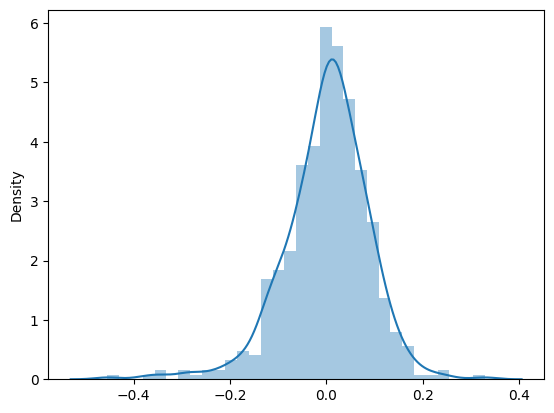

In [683]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred
res = y_train - y_train_pred
sns.distplot(res)

<font color= 'yellow'>
# Inference : Normal distribution of errors. So Assumption holds good.
</font color>

# Prediction and Evaluation on test set (Manual Process)

In [684]:
num_vars = ['Temperature','Humidity','windspeed','Count']
bs_test_m = bs_test
bs_test_m[num_vars] = scaler.transform(bs_test_m[num_vars])
bs_test_m

,Temperature,Humidity,windspeed,Count,spring,summer,winter,YR_2019,no_holiday,AUG,...,SEP,MON,SAT,SUN,THR,TUE,WED,Workingday,Mist,Snow
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.519232,0.756118,0.283397,0.757478,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
127,0.584649,0.650923,0.069510,0.495973,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
640,0.745598,0.817947,0.052115,0.868615,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,1,0
72,0.331557,0.512107,0.203418,0.232858,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [685]:
#Test dataset and prediction
y_test_m = bs_test_m.pop('Count')
X_test_m = bs_test
X_test_m = X_test_m[X.columns]
X_test_m_sm = sm.add_constant(X_test_m)
y_test_m_predict = lr_model.predict(X_test_m_sm)
y_test_m_predict

184    0.418754
535    0.891123
299    0.430858
221    0.582422
152    0.557954
         ...   
702    0.712038
127    0.477235
640    0.812785
72     0.293521
653    0.751901
Length: 220, dtype: float64

In [686]:
#r2 score
r2_score(y_true=y_test_m,y_pred= y_test_m_predict)

0.8168681962672556

# RFE Variable Selection

Even though temp is having high VIF. Considering the functionality lets check the variables are per RFE

In [687]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)
rfe

RFE(estimator=LinearRegression())

In [688]:
# Releavent Columns
sel_col =   X_train.columns[rfe.support_]
sel_col

Index(['Temperature', 'Humidity', 'windspeed', 'spring', 'summer', 'winter',
       'YR_2019', 'no_holiday', 'JUL', 'SEP', 'SAT', 'Workingday', 'Mist',
       'Snow'],
      dtype='object')

In [689]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Temperature', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('YR_2019', True, 1),
 ('no_holiday', True, 1),
 ('AUG', False, 14),
 ('DEC', False, 4),
 ('FEB', False, 5),
 ('JAN', False, 2),
 ('JUL', True, 1),
 ('JUN', False, 12),
 ('MAR', False, 15),
 ('MAY', False, 7),
 ('NOV', False, 3),
 ('OCT', False, 13),
 ('SEP', True, 1),
 ('MON', False, 8),
 ('SAT', True, 1),
 ('SUN', False, 6),
 ('THR', False, 10),
 ('TUE', False, 9),
 ('WED', False, 11),
 ('Workingday', True, 1),
 ('Mist', True, 1),
 ('Snow', True, 1)]

In [690]:
#Building Model

X_train_rfe = X_train[sel_col]
X_train_rfe_n = sm.add_constant(X_train_rfe) 
lm = sm.OLS(y_train,X_train_rfe_n).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.11e-191
Time:                        20:48:23   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2402      0.036      6.714      0.000       0.170       0.310
Temperature     0.5277      0.033     15.884      0.000       0.462       0.593
Humidity       -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed      -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring         -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer          0.0537      0.015      3.631      0.000       0.025       0.083
winter          0.0992      0.017      5.815      0.000       0.066       0.133
YR_2019         0.2298      0.008     28.647      0.000       0.214       0.246
no_holiday     -0.0591      0.027     -2.192      0.029      -0.112      -0.006
JUL            -0.0546      0.018     -3.019      0.003      -0.090      -0.019
SEP             0.0820      0.017      4.966      0.000       0.050       0.114
SAT             0.0530      0.015      3.648      0.000       0.024       0.082
Workingday      0.0430      0.012      3.725      0.000       0.020       0.066
Mist           -0.0563      0.010     -5.425      0.000      -0.077      -0.036
Snow           -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color= 'green'>
When we checked Humidity, Non-holidays were not affecting much . hence removing the same
</font color>

In [691]:
X_train_rfe_nw = X_train_rfe.drop(["no_holiday", "Humidity"],axis=1)
X_train_rfe_n_lm = sm.add_constant(X_train_rfe_nw)
lm = sm.OLS(y_train,X_train_rfe_n_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.12e-189
Time:                        20:48:23   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1492      0.031      4.881      0.000       0.089       0.209
Temperature     0.4920      0.033     14.991      0.000       0.427       0.556
windspeed      -0.1499      0.025     -6.040      0.000      -0.199      -0.101
spring         -0.0664      0.021     -3.182      0.002      -0.107      -0.025
summer          0.0481      0.015      3.196      0.001       0.019       0.078
winter          0.0838      0.017      4.910      0.000       0.050       0.117
YR_2019         0.2339      0.008     28.756      0.000       0.218       0.250
JUL            -0.0486      0.018     -2.637      0.009      -0.085      -0.012
SEP             0.0740      0.017      4.414      0.000       0.041       0.107
SAT             0.0664      0.014      4.671      0.000       0.038       0.094
Workingday      0.0545      0.011      4.938      0.000       0.033       0.076
Mist           -0.0817      0.009     -9.428      0.000      -0.099      -0.065
Snow           -0.2883      0.024    -11.795      0.000      -0.336      -0.240
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [692]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_nw.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_nw.values, i) for i in range(X_train_rfe_nw.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF",ascending=False)       
#("VIF" or 'VIF')
#VIF values should be less than 5
vif

,Features,VIF
0,Temperature,6.73
9,Workingday,4.66
1,windspeed,4.64
2,spring,2.38
3,summer,2.32
5,YR_2019,2.07
4,winter,1.91
8,SAT,1.83
6,JUL,1.58
10,Mist,1.57


Residual Analysis of train data

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

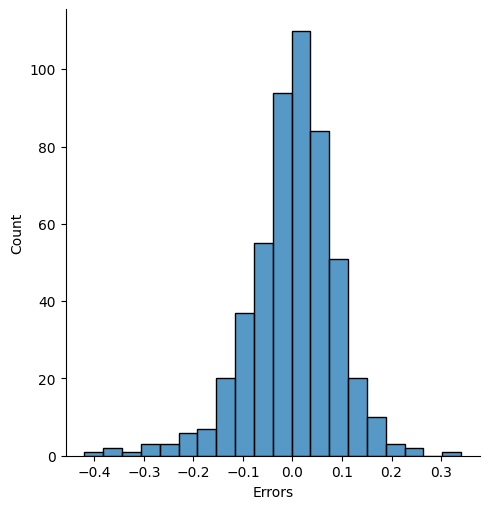

In [693]:
y_train_count = lm.predict(X_train_rfe_n_lm)
y_train_count
#Plot histogram for error terms
fig = plt.figure()
residual = y_train - y_train_count
sns.displot((residual),bins=20)
plt.xlabel('Errors')

<font color = 'yellow'>
From Distplot it is evident that Errors are following a normal distribution.So we can rely on the prediction.
</font color>

# Test the test set 

In [695]:
y_test_rfe = y_test_m
X_test_rfe= bs_test

In [697]:
#drop all the columns which are dropped from train set
X_test_rfe_n = X_test_rfe[X_train_rfe_nw.columns]
X_test_rfe_n = sm.add_constant(X_test_rfe_n)
#predict the test y values
y_test_rfe_pred = lm.predict(X_test_rfe_n)
y_test_rfe_pred

184    0.415597
535    0.906131
299    0.407696
221    0.586599
152    0.573323
         ...   
702    0.734443
127    0.474515
640    0.798835
72     0.269960
653    0.727237
Length: 220, dtype: float64

# Evaluate the Prediction

Text(0, 0.5, 'y_pred')

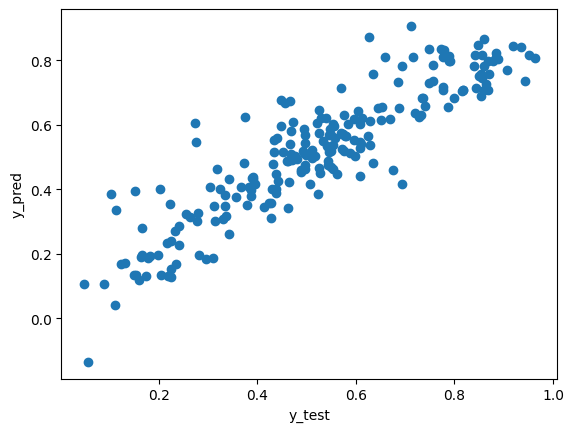

In [698]:
fig = plt.figure()
plt.scatter(y_test_rfe,y_test_rfe_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

#Predicted Values and test values are in same range. Hance prediction is correct

<font color= 'yellow'>
Inference
</font color>



# Factors affecting the usage of bike  :
   # Temperature
   # Seasonal changes
   # Snow /Mist Climatic changes
   # Working day or not